In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aging.plotting import format_plots
from scipy.signal import find_peaks
from scipy.stats import gaussian_kde
from toolz import valmap, concat

In [2]:
format_plots()

array([16. , 33. , 49.5, 70.5])

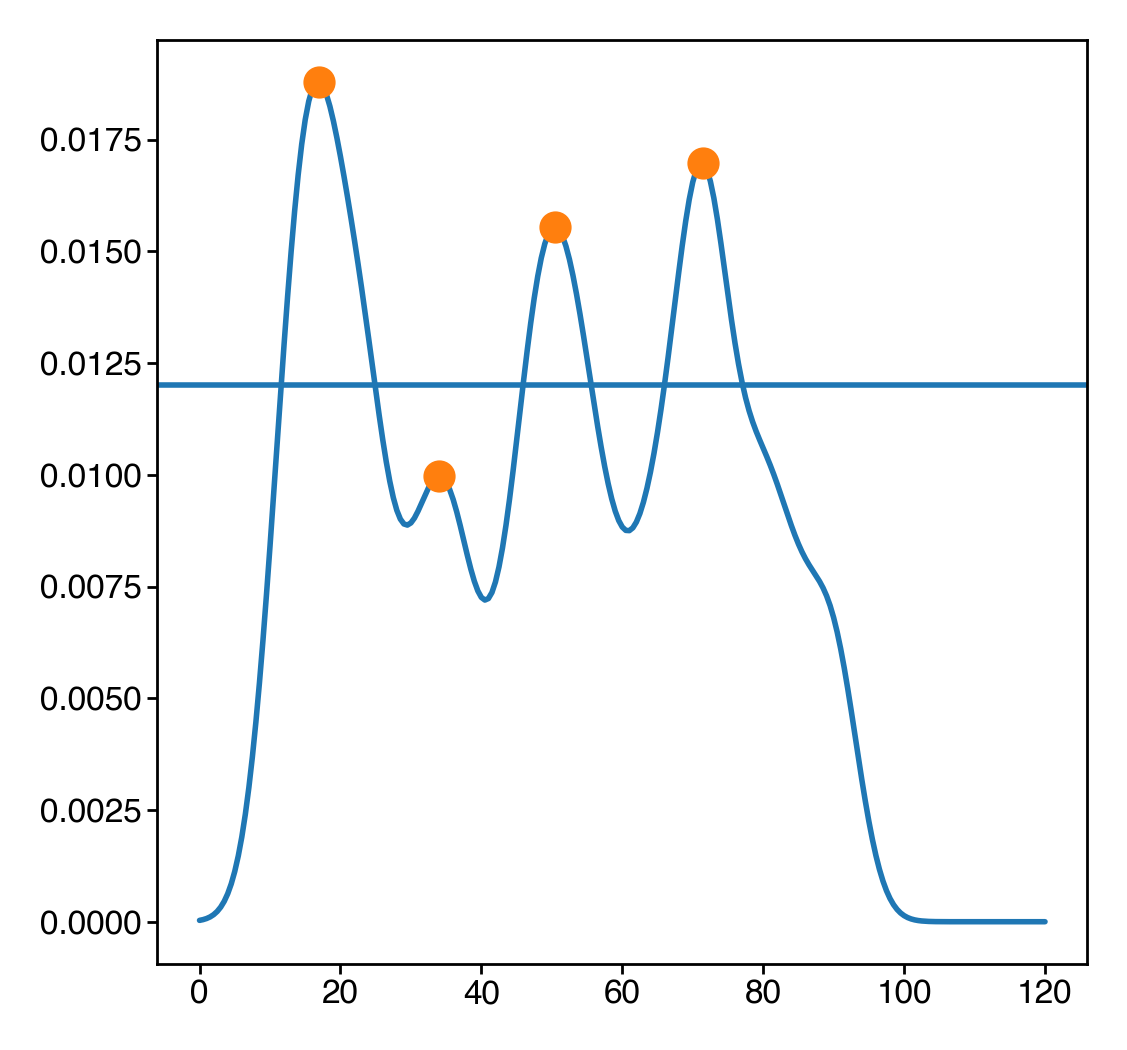

In [87]:
keep_syllables = np.loadtxt('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/to_keep_syllables_raw.txt', dtype=int)
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_males_raw_usage_matrix_v00.parquet')
df = df.query('age < 110')

avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(7, center=True, min_periods=1, win_type='exponential').mean(tau=3)
deriv_win = 1
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=5)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)
all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.15)
n_samples = 241
age = np.linspace(0, 120, n_samples)
e = k.evaluate(age)
plt.plot(age, e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks], e[pks], 'o')
plt.axhline(0.012)
age[pks] - (deriv_win)

In [88]:
age[np.where(np.diff((e > 0.012).astype(int)) > 0)[0]]

array([11.5, 45.5, 65.5])

array([23. , 49. , 77.5, 92.5])

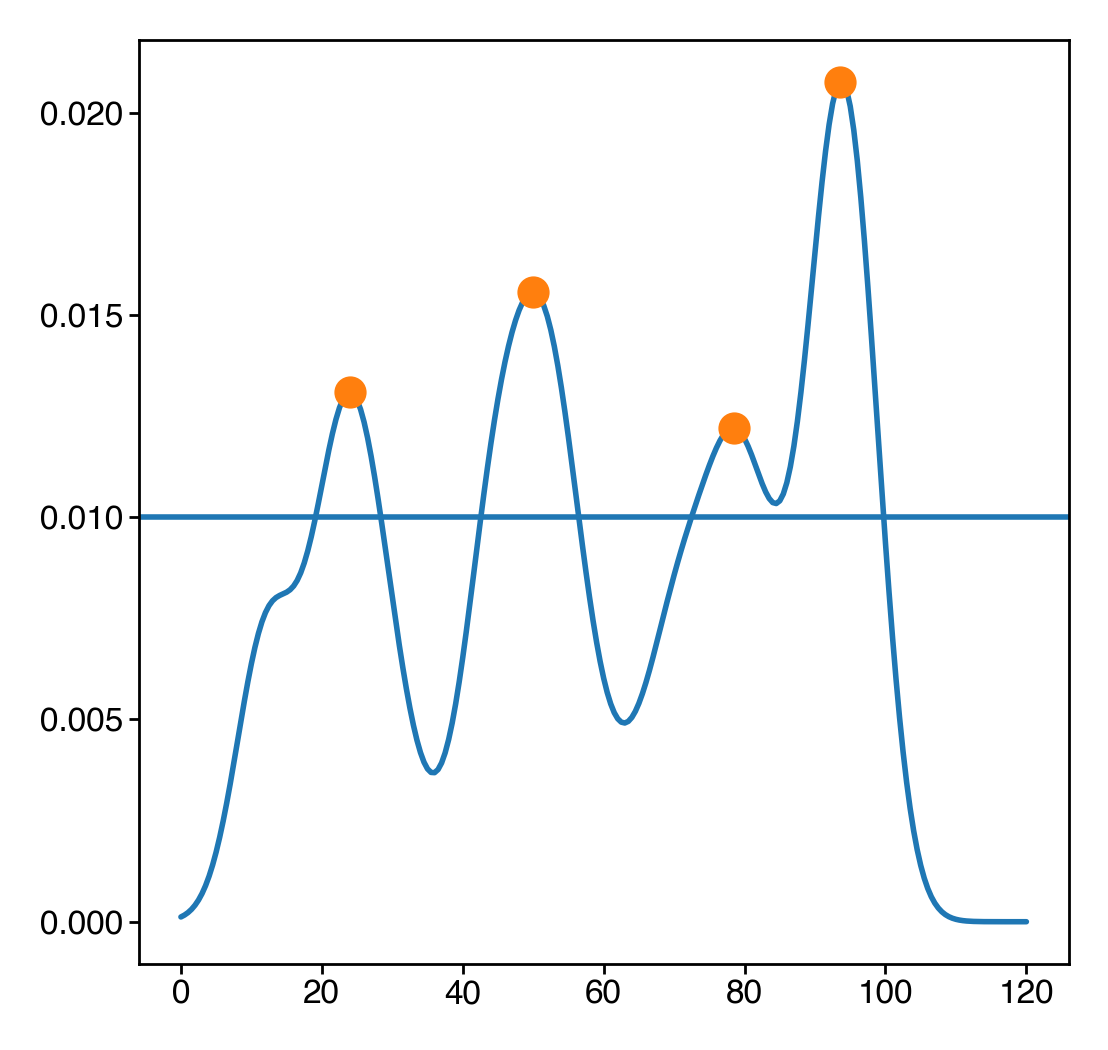

In [89]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/ontogeny_females_raw_usage_matrix_v00.parquet')
df = df.query('age < 100')

avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(7, center=True, min_periods=1, win_type='exponential').mean(tau=3)
deriv_win = 1
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=5)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)
all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.15)
n_samples = 241
age = np.linspace(0, 120, n_samples)
e = k.evaluate(age)
plt.plot(age, e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks], e[pks], 'o')
plt.axhline(0.010)
age[pks] - (deriv_win)

In [91]:
age[np.where(np.diff((e > 0.010).astype(int)) > 0)[0]]

array([19. , 42.5, 72. ])

## Longtogeny

In [92]:
from aging.organization.dataframes import load_male_long_df, DF_PATHS, load_female_long_df

[15.5 28.5 40.5]


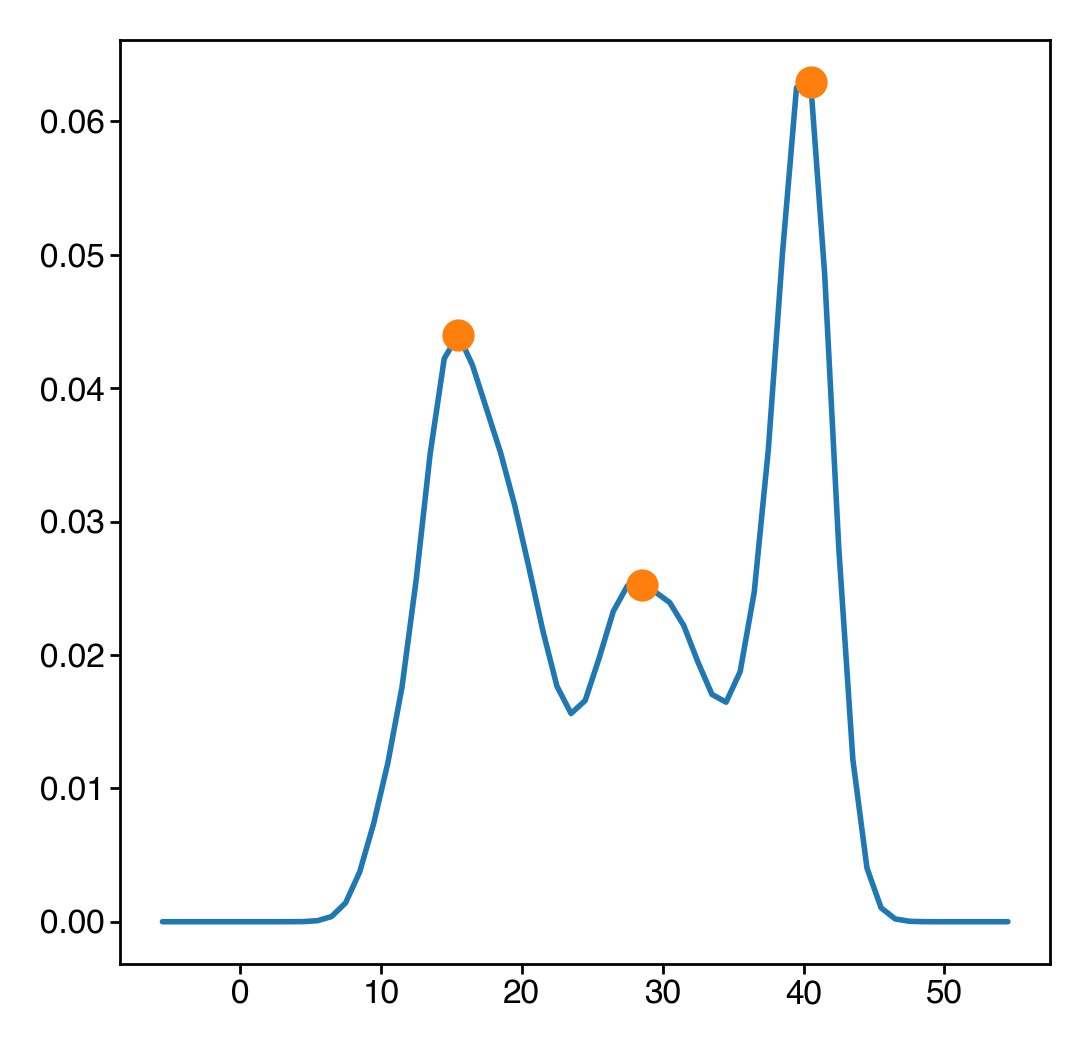

In [93]:
df = load_male_long_df(True, False, True, df_path=DF_PATHS.usage_male)
avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(19, center=True, min_periods=1, win_type='exponential').mean(tau=5.75)
deriv_win = 11
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=10)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)

all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.16)
n_samples = 61
age = np.linspace(0, 60, n_samples)
e = k.evaluate(age)
plt.plot(age - (deriv_win / 2), e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks] - (deriv_win / 2), e[pks], 'o')
print(age[pks] - (deriv_win / 2))

In [95]:
age[np.where(np.diff((e > 0.030).astype(int)) > 0)[0]] - (deriv_win / 2)

array([12.5, 36.5])

[16.5 26.5 36.5]


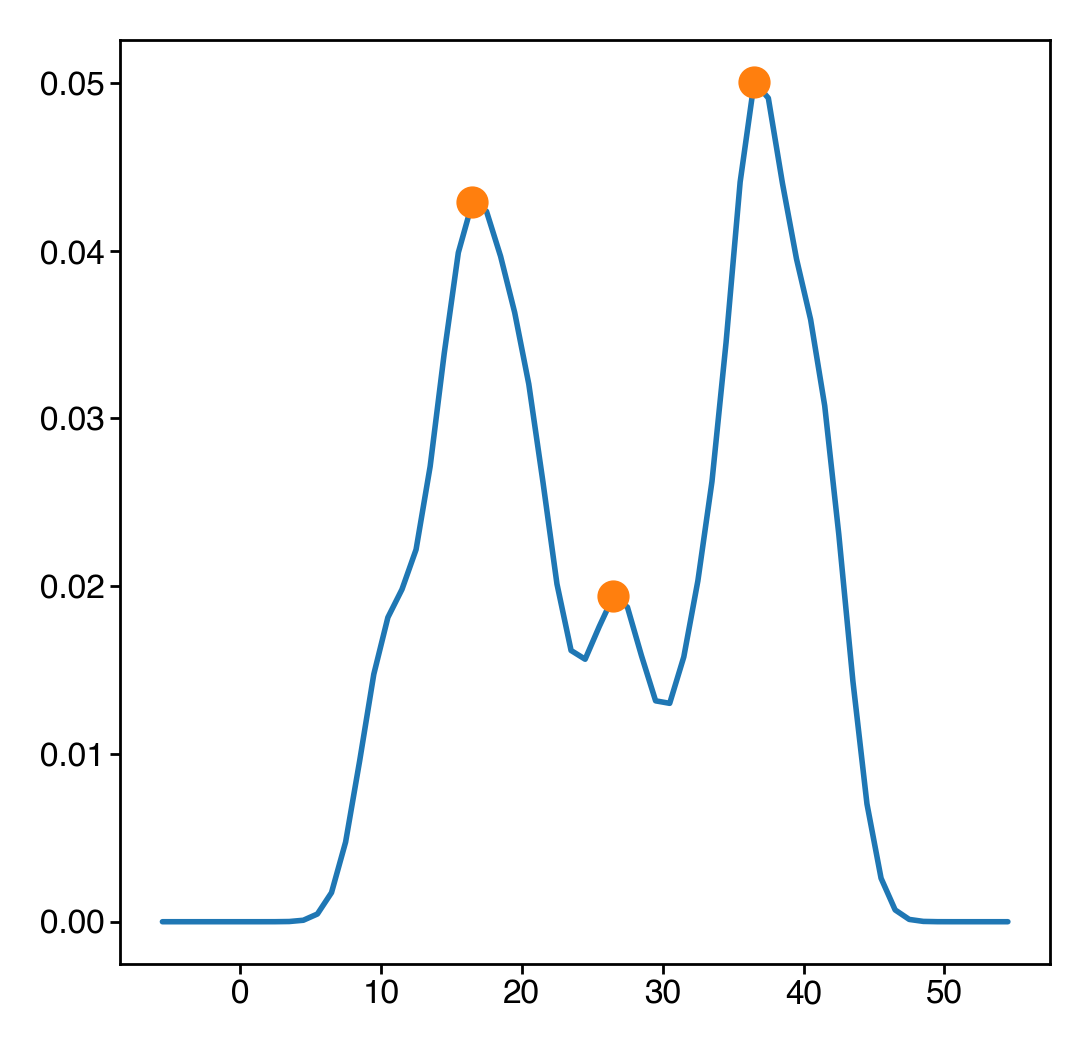

In [96]:
df = load_female_long_df(True, False, True, df_path=DF_PATHS.usage_female)
avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(19, center=True, min_periods=1, win_type='exponential').mean(tau=5.75)
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=10)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)

all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.16)
n_samples = 61
age = np.linspace(0, 60, n_samples)
e = k.evaluate(age)
plt.plot(age - (deriv_win / 2), e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks] - (deriv_win / 2), e[pks], 'o')
print(age[pks] - (deriv_win / 2))

In [97]:
age[np.where(np.diff((e > 0.030).astype(int)) > 0)[0]] - (deriv_win / 2)

array([13.5, 33.5])

## Long - bambi

[18.5 33.5]


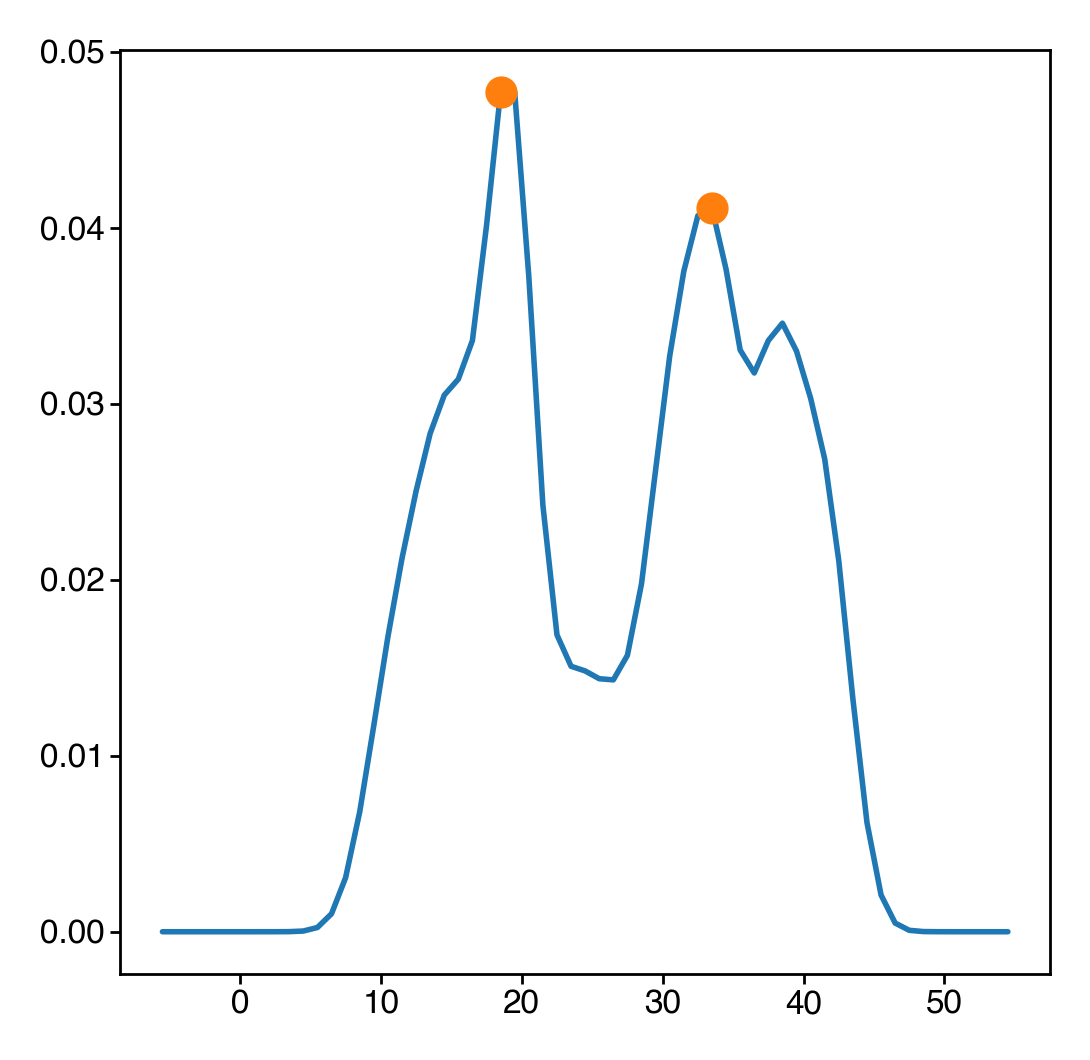

In [103]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_males_raw_usage_df_beh_age.parquet')
avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(19, center=True, min_periods=1, win_type='exponential').mean(tau=5.75)
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=10)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)

all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.16)
n_samples = 61
age = np.linspace(0, 60, n_samples)
e = k.evaluate(age)
plt.plot(age - (deriv_win / 2), e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks] - (deriv_win / 2), e[pks], 'o')
print(age[pks] - (deriv_win / 2))

In [104]:
age[np.where(np.diff((e > 0.035).astype(int)) > 0)[0]] - (deriv_win / 2)

array([16.5, 30.5])

[12.5 19.5 37.5]


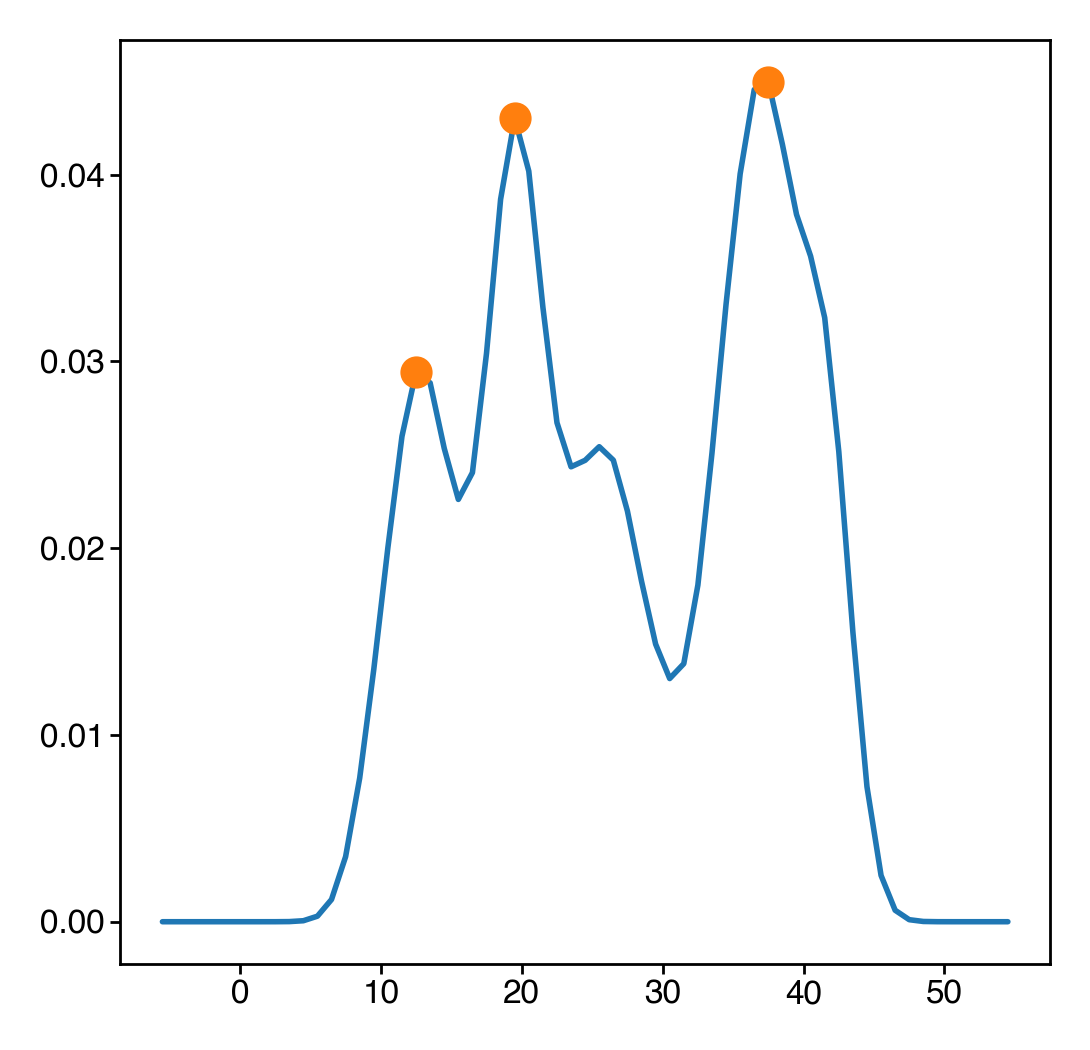

In [100]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-30-longtogeny_v2_females_raw_usage_df_beh_age.parquet')
avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(19, center=True, min_periods=1, win_type='exponential').mean(tau=5.75)
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=10)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)

all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.16)
n_samples = 61
age = np.linspace(0, 60, n_samples)
e = k.evaluate(age)
plt.plot(age - (deriv_win / 2), e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks] - (deriv_win / 2), e[pks], 'o')
print(age[pks] - (deriv_win / 2))

In [102]:
age[np.where(np.diff((e > 0.035).astype(int)) > 0)[0]] - (deriv_win / 2)

array([17.5, 34.5])

## Ont - BAMBI

array([19. , 43.5, 77. ])

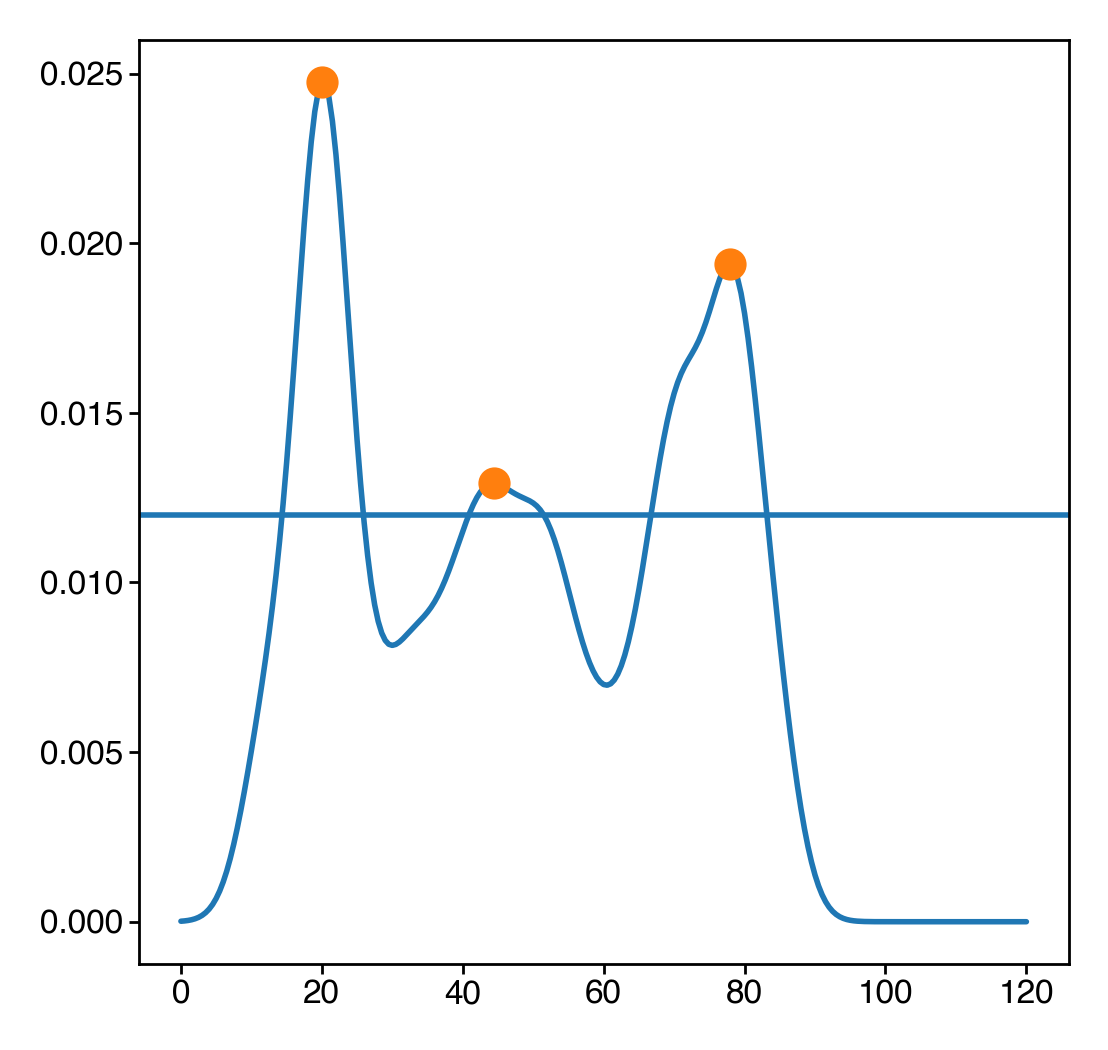

In [105]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-29-ontogeny_males_raw_usage_df_beh_age.parquet')
df = df.query('age < 110')

avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(7, center=True, min_periods=1, win_type='exponential').mean(tau=3)
deriv_win = 1
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=5)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)
all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.15)
n_samples = 241
age = np.linspace(0, 120, n_samples)
e = k.evaluate(age)
plt.plot(age, e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks], e[pks], 'o')
plt.axhline(0.012)
age[pks] - (deriv_win)

In [106]:
age[np.where(np.diff((e > 0.012).astype(int)) > 0)[0]]

array([14. , 40.5, 66.5])

array([23.5, 47.5, 77.5])

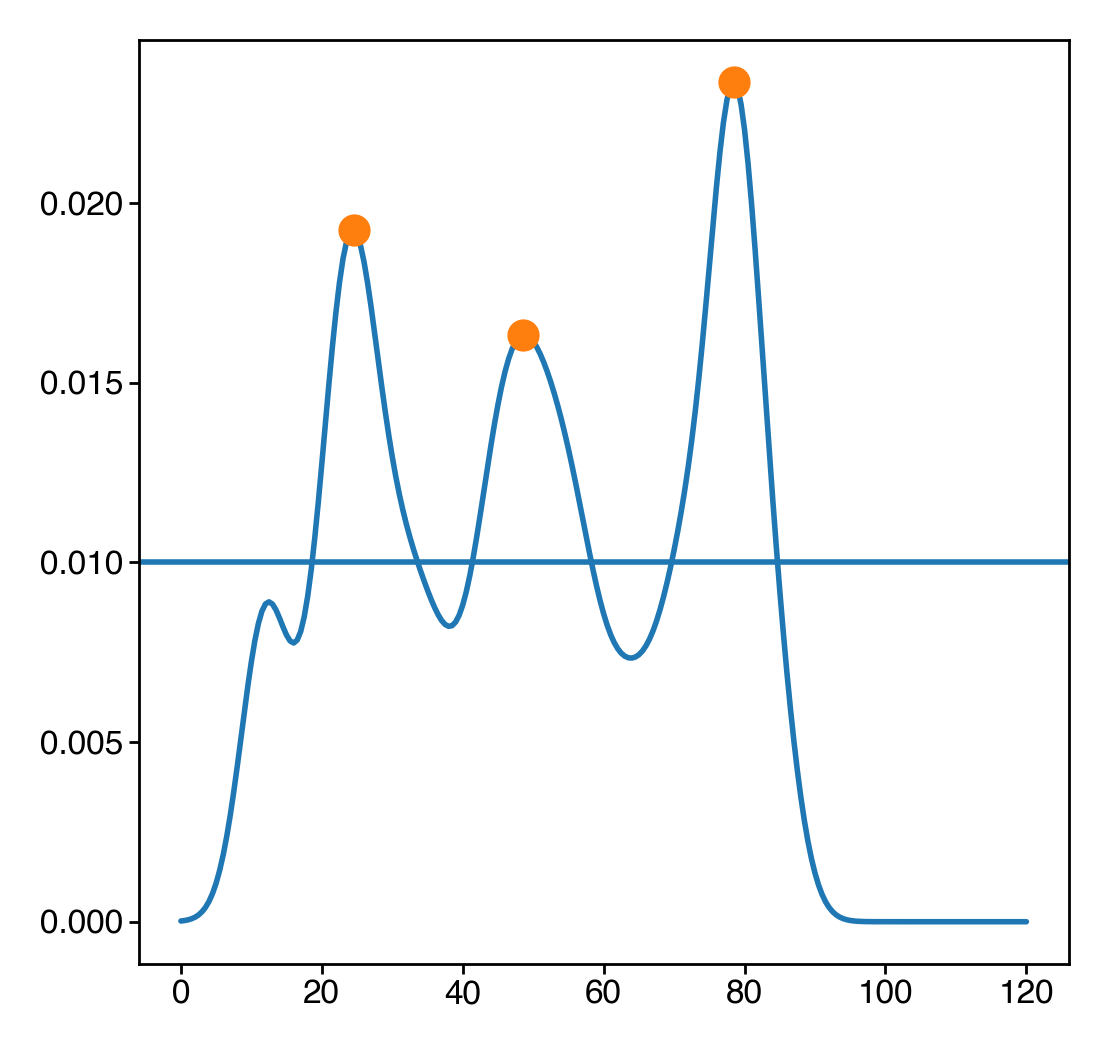

In [107]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11-1/beh_age_df/2024-07-29-ontogeny_females_raw_usage_df_beh_age.parquet')
df = df.query('age < 100')

avg_df = df.groupby('age')[keep_syllables].mean()
avg_df_smooth = avg_df.rolling(7, center=True, min_periods=1, win_type='exponential').mean(tau=3)
deriv_win = 1
abs_deriv = (avg_df_smooth.diff(deriv_win) / deriv_win).abs()

syll_peaks = {k: find_peaks(abs_deriv[k], distance=5)[0] for k in abs_deriv.columns}
syll_peak_ages = valmap(lambda x: abs_deriv.index[x].values, syll_peaks)
all_peaks = list(concat(syll_peak_ages.values()))

k = gaussian_kde(all_peaks, bw_method=0.15)
n_samples = 241
age = np.linspace(0, 120, n_samples)
e = k.evaluate(age)
plt.plot(age, e)
pks, _ = find_peaks(e, distance=n_samples // 8)
plt.plot(age[pks], e[pks], 'o')
plt.axhline(0.010)
age[pks] - (deriv_win)

In [109]:
age[np.where(np.diff((e > 0.012).astype(int)) > 0)[0]]

array([19.5, 43. , 71.5])